In [1]:
import requests
import lxml.html as lh
import pandas as pd
import sqlite3
import PyPDF2
from bs4 import BeautifulSoup

In [9]:
ECB_docs = []
ECB_titles = []
ECB_dates = []
ECB_category = []
ECB_URLs = []

for ii in range(21):
    print('current year {}'.format(2020-ii))
    page = requests.get('https://www.ecb.europa.eu/press/pr/date/{}/html/index_include.en.html'.format(2020-ii))
    soup = BeautifulSoup(page.content, 'html.parser')
    Countent = soup.find_all('a')
    links = []
    titles = []
    for p in Countent:
        if not p.find(class_='arrow') and not p.find(class_='ecb-full') and '.html' in p['href'] and 'English' not in str(p):
            links.append('https://www.ecb.europa.eu'+p['href'])
            titles.append(p.get_text())
    for n,urls in enumerate(links):
        print('\r on the {} article'.format(n),end='')
        try:
            page = requests.get(urls)
            soup = BeautifulSoup(page.content, 'html.parser')
            Countent = soup.find_all('', class_='ecb-pressContent')[0]
            content = []
            for item in list(Countent.children):
                try: 
                    item.children        
                    for i in item.children:
                        if 'href=' not in str(i) and 'media queries' not in str(i) and 'media enquiries' not in str(i):
                            try: content.append(i.get_text()) 
                            except: pass
                except:
                    pass
            category = soup.find_all('', class_='ecb-pressCategory')[0].get_text()
            try:
                Date = soup.find_all('', class_='ecb-pressContentPubDate')[0].get_text()
            except:
                Date = soup.find_all('', class_='ecb-publicationDate')[0].get_text()
            Countent = content[3:]
            kind = 'Press'
            ECB_docs.append(' \newline '.join(Countent))
            ECB_titles.append(titles[n])
            ECB_dates.append(Date)
            ECB_category.append(kind)
            ECB_URLs.append(urls)
        except:
            try:
                a = soup.find_all('', class_='publication')[0]
                Countent = []
                for item in a.children:
                    if 'footnotes' not in str(item) and 'impressum' not in str(item):
                        Countent.append(item.get_text())
                kind = 'Publication'
                ECB_docs.append(' ##newline## '.join(Countent))
                ECB_titles.append(titles[n])
                ECB_dates.append(Date)
                ECB_category.append(kind)
                ECB_URLs.append(urls)
            except:
                print('{}-{} failed'.format(2020-ii,n))
                pass

        



current year 2020
 on the 54 articlecurrent year 2019
 on the 49 article2019-49 failed
 on the 88 articlecurrent year 2018
 on the 72 articlecurrent year 2017
 on the 70 articlecurrent year 2016
 on the 74 articlecurrent year 2015
 on the 96 articlecurrent year 2014
 on the 126 articlecurrent year 2013
 on the 125 articlecurrent year 2012
 on the 43 article2012-43 failed
 on the 101 articlecurrent year 2011
 on the 106 articlecurrent year 2010
 on the 102 articlecurrent year 2009
 on the 84 articlecurrent year 2008
 on the 117 articlecurrent year 2007
 on the 102 articlecurrent year 2006
 on the 80 articlecurrent year 2005
 on the 85 articlecurrent year 2004
 on the 92 articlecurrent year 2003
 on the 89 articlecurrent year 2002
 on the 78 articlecurrent year 2001
 on the 81 articlecurrent year 2000
 on the 65 article

In [19]:
ECB_data = pd.DataFrame({'ECB_dates':ECB_dates,'ECB_category':ECB_category,'ECB_titles':ECB_titles,'ECB_URLs':ECB_URLs,'ECB_docs':ECB_docs})
ECB_data.ECB_docs =  ECB_data.ECB_docs.str.replace(' \newline ', ' ##newline## ', regex=True)
ECB_data.to_csv('ECB_news.csv')

In [18]:
# ECB_data.ECB_dates = ECB_data.ECB_dates.str.replace('\n', '', regex=True)
# ECB_data.ECB_category = ECB_data.ECB_category.str.replace('\n', '', regex=True)
# ECB_data.ECB_titles = ECB_data.ECB_titles.str.replace('\n', '', regex=True)
# ECB_data.ECB_docs =  ECB_data.ECB_docs.str.replace('\n', '', regex=True)


In [17]:
ECB_data.ECB_docs =  ECB_data.ECB_docs.str.replace(' \newline ', ' ##newline## ', regex=True)


# Bank of England

In [ ]:
import requests 
page = requests.get('https://www.bankofengland.co.uk/news/news')
session = requests.Session()
session.head('https://www.bankofengland.co.uk/news/news')

response = requests.post(
    url='https://www.bankofengland.co.uk/_api/News/RefreshPagedNewsList',
    data={
        'Id': '%7BCE377CC8-BFBC-418B-B4D9-DBC1C64774A8%7D',
        'PageSize': '30',
        'NewsTypesAvailable%5B%5D': '09f8960ebc384e3589da5349744916ae',
        'Page': '8',
        'Grid' : 'false'
        
    },
    headers={
        'authority': 'www.bankofengland.co.uk',
        'method': 'POST',
        'path': '/_api/News/RefreshPagedNewsList',
        'scheme': 'https',
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8,zh-CN;q=0.7,zh;q=0.6',
        'content-length': '181',
        'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'cookie': 'boeconsent=analytics; _ga=GA1.3.2003282253.1589483466; SC_ANALYTICS_GLOBAL_COOKIE=bbd29d6553704a4e96072b008d7a38ad|True; _gid=GA1.3.1968674965.1590867561; ak_bmsc=1BB2ADF5C3A06C9D957EDDC0AFB44F7D17D14997DA73000068B6D25EC806DC41~ploR4wcoZkAae/TkAar7UdTo2pOi6Io6clCfFY5kEt+PLqWKzgWDGPFXIrE0LcAISwdILfZfGZuaufxquusW5x+xIAFO0Zre8BxlkJ14gajPDkKxBpc84qdwUDn/J8wJhXClVofmh1uT6eqf94VqunG34Ribqg8refMowibuBxTntgniRYAWXIWgWKxBHU+4gsLs0eoneeuT7jDIVxHj+HO8msHN78XxMiJoDvw9Ck1+mcMzYiK3fzDQjTBOJcMwAV; ASP.NET_SessionId=wgxd5bktklu3vuaxheci32lr; __RequestVerificationToken=fu5B_J89E2pHjXVU3hQBnFzKSKPmKIGW1ru-E7hCB65TFOR165-i-hcV_yHJ8ZUDY8aBlKCXDd7zUJJFeMBPCbgbGD81; _ce.s=v~vyLRZuqXu4_VPVkbcpd-zkefuPk~ir~1; ROUTEID=.2; ASPSESSIONIDCCDCCDTS=HDPPNHOAIJIJDFPJHHIGJABE; AKA_A2=A; _gat_UA-5804066-4=1; TS01b80d1f=01b7ed2270ad13cd82113c7f7f50574c990d0440e4607c130f0ebb98a01fa583255b28922bcaa3ebe687713c946cfd7ef68e097f501d233cacd478c3ec77317f2eac9a6900ab6f44c66fc3161bd0a82cd1e968e633e4f733a534bba0941e94da9aa1dcd3504cbc2c2a9e0bfc0a3085fbdfeb220341; bm_sv=636B2F1AC5FD960BF38FAA81C6124F72~+nEGhqdnFJNU5bU8EOA+oos8GZcqgu4c4CWpcEOZd49KAiF3Tg31PT1r6Nk8b/bzviK7/3Y/LX9ztp7FbnhiMyb05ebrO0MMHwDoNJKmWbgxJcOJC+A+E0EqXqk4AO4gKYa+ifvKeCf6vzCuaROgW2U7D8wQHByBiq7SlxMpxNM=; _gali=item-0',        'origin': 'https://www.bankofengland.co.uk',
        'referer': 'https://www.bankofengland.co.uk/news/news',
        }
)
response.text

In [36]:
news_and_minutes = pd.read_csv('Newsandminutes_BankofEngland.csv')
BOE_MPC_news = news_and_minutes.loc[news_and_minutes['tag']=='// News // Monetary Policy Committee (MPC)',:]


### Download MPC documents

In [167]:
import urllib.request
pdf_locations = []
if_downloaded = []
documents = []
for n,url in enumerate(BOE_MPC_news.link):
    print('\r working on {} document'.format(n),end='')
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        location = 'https://www.bankofengland.co.uk'+ soup.find_all('', class_='btn btn-pubs btn-has-img btn-lg')[0]['href']
        pdf_locations.append(location)
        if_downloaded.append(-1)
        documents.append('')
        
        
        response = urllib.request.urlopen(location)
        file = open('.\downloaded_files\MPC\{}.pdf'.format(list(BOE_MPC_news.title)[n]), 'wb')
        file.write(response.read())
        file.close()
    except:
        content = []
        for item in soup.find_all('', class_='col9'):
            if 'global-breadcrumbs' not in str(item):
                content.extend(item.get_text().replace('\xa0','').replace('\r','').split('\n'))
        if_downloaded.append(1)
        documents.append(content)
BOE_MPC_news.loc[:,'content'] = documents
BOE_MPC_news.loc[:,'downloaded'] = if_downloaded

 working on 52 document

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:27]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:28]


### Download all minutes files

In [37]:
all_miniutes = news_and_minutes.loc[news_and_minutes['tag']=='// News // Minutes',:]
all_miniutes

,title,link,date,tag
1,Minutes of the Wholesale Distribution Steering...,https://www.bankofengland.co.uk/minutes/2020/w...,27 May 2020,// News // Minutes
12,Minutes of the RTGS renewal programme external...,https://www.bankofengland.co.uk/minutes/2020/m...,01 May 2020,// News // Minutes
14,Minutes of Money Markets Committee meeting - 9...,https://www.bankofengland.co.uk/minutes/2020/m...,29 April 2020,// News // Minutes
15,Minutes of the UK Money Markets Code Sub-Commi...,https://www.bankofengland.co.uk/minutes/2020/u...,29 April 2020,// News // Minutes
21,Minutes of the Wholesale Distribution Steering...,https://www.bankofengland.co.uk/minutes/2020/w...,20 April 2020,// News // Minutes
...,...,...,...,...
2697,Minutes of the MPC Meeting held on 8 and 9 Oct...,https://www.bankofengland.co.uk/minutes/1997/m...,12 November 1997,// News // Minutes
2698,Minutes of the MPC Meeting held on 10 and 11 S...,https://www.bankofengland.co.uk/minutes/1997/m...,15 October 1997,// News // Minutes
2699,Minutes of the MPC Meeting held on 6 and 7 Aug...,https://www.bankofengland.co.uk/minutes/1997/m...,17 September 1997,// News // Minutes
2700,Minutes of the MPC Meeting held on 9 and 10 Ju...,https://www.bankofengland.co.uk/minutes/1997/m...,13 August 1997,// News // Minutes


In [223]:
all_miniutes_locations = []
documents = []

for n,url in enumerate(all_miniutes.link):
    print('\r working on {} document'.format(n),end='')
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        location = 'https://www.bankofengland.co.uk'+ soup.find_all('', class_='btn btn-pubs btn-has-img btn-lg')[0]['href']
    except:
        try:
            location = 'https://www.bankofengland.co.uk'+ soup.find_all('', class_='btn btn-cta btn-lg')[0]['href']
        except:
            for i in soup.find_all('', class_='col9'):
                if i.find('a') !=None:
                    location = 'https://www.bankofengland.co.uk' + i.find('a')['href']
    documents.append('')
    all_miniutes_locations.append(location)
    response = urllib.request.urlopen(location)
    file = open('.\downloaded_files\minutes\{}.pdf'.format(list(all_miniutes.title)[n]), 'wb')
    file.write(response.read())
    file.close()
    
all_miniutes.loc[:,'content'] = documents
all_miniutes.loc[:,'download'] = all_miniutes_locations

 working on 426 document

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [indexing.py:844]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [indexing.py:965]


In [259]:
all_miniutes

,title,link,date,tag,content,download
1,Minutes of the Wholesale Distribution Steering...,https://www.bankofengland.co.uk/minutes/2020/w...,27 May 2020,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
12,Minutes of the RTGS renewal programme external...,https://www.bankofengland.co.uk/minutes/2020/m...,01 May 2020,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
14,Minutes of Money Markets Committee meeting - 9...,https://www.bankofengland.co.uk/minutes/2020/m...,29 April 2020,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
15,Minutes of the UK Money Markets Code Sub-Commi...,https://www.bankofengland.co.uk/minutes/2020/u...,29 April 2020,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
21,Minutes of the Wholesale Distribution Steering...,https://www.bankofengland.co.uk/minutes/2020/w...,20 April 2020,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
...,...,...,...,...,...,...
2697,Minutes of the MPC Meeting held on 8 and 9 Oct...,https://www.bankofengland.co.uk/minutes/1997/m...,12 November 1997,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
2698,Minutes of the MPC Meeting held on 10 and 11 S...,https://www.bankofengland.co.uk/minutes/1997/m...,15 October 1997,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
2699,Minutes of the MPC Meeting held on 6 and 7 Aug...,https://www.bankofengland.co.uk/minutes/1997/m...,17 September 1997,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...
2700,Minutes of the MPC Meeting held on 9 and 10 Ju...,https://www.bankofengland.co.uk/minutes/1997/m...,13 August 1997,// News // Minutes,,https://www.bankofengland.co.uk/-/media/boe/fi...


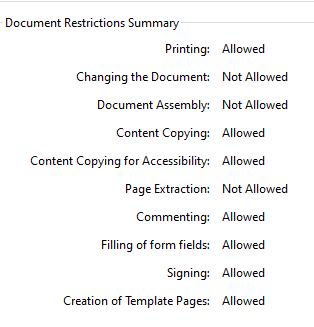

In [20]:
import docx2txt
# read in word file
result = docx2txt.process("Minutes of the London FXJSC meeting - September 2016.docx")

In [29]:
Word_set = [i for i in result.split('\n') if i.count(' ')>=12 and 'http://' not in i]

['The Chair welcomed all attendees and informed them that Adrian Boehler (BNP Paribas) had joined the Committee.',
 'Apologies were received from Adrian Boehler, David Puth, Frances Hinden, Galina Dimitrova, Zar Amrolia, Chris Allen and Isabelle Dennigan.',
 'Tom Jacques (Greenwich Associates) provided a presentation summarising some of the initial findings from a pilot survey they conducted on conduct and fair outcomes in the FX market. Attendees discussed: (i) how fair outcomes can be defined and determined; (ii) the scope for broad-based independent surveys to provide information on conduct standards across the industry and how they can be used to improve standards and; (iii) the importance of client feedback and an understanding of what the key components of fair outcomes are from their perspective. Tom Jacques noted that Greenwich had further refined the survey questions following the pilot and were looking to incorporate similar questions into their fixed income, cash equities an

In [58]:
import os
import numpy as np
all_miniutes.loc[:,'document_string'] = ''
for file in os.listdir("./converted_files/minutes"):
    result = docx2txt.process("./converted_files/minutes/"+file)
    Word_set = [[i for i in result.split('\n') if i.count(' ')>=12 and 'http://' not in i]]
    all_miniutes.loc[all_miniutes['title']==file[:-5],'document_string'] = Word_set

C:\Users\lunarhero\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\lunarhero\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\lunarhero\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [76]:
list(all_miniutes.loc[all_miniutes['document_string']=='','title'])

['Minutes of the RTGS renewal programme external advisory body - March 2020',
 'Minutes of the SONIA Stakeholder Advisory Group - 26 February 2020',
 'Minutes of the Wholesale Distribution Steering Group - February 2020',
 'Minutes of the UK Money Markets Code Sub-Committee - January 2020',
 'Minutes of the Standards Advisory Panel - December 2019',
 'Minutes of the Working Group on Sterling Risk-Free Reference Rates - November 2019',
 "Third meeting of the PRA and FCA's joint Climate Financial Risk Forum",
 'Minutes of the Meeting of the Court of Directors held on 25 October 2019',
 'Minutes of the London FXJSC Legal Sub-Committee Meeting – 10 September 2019',
 'Minutes of the Meeting of the Court of Directors held on 4 July 2019',
 'Minutes of the Wholesale Distribution Steering Group - July 2019',
 'Second meeting of the PRA and FCA’s joint Climate Financial Risk Forum',
 'Minutes of the London FXJSC meeting - 8 February 2019',
 'Minutes of the Securities Lending Committee meeting -

In [75]:
url = 'https://www.bankofengland.co.uk/minutes/2020/minutes-of-the-rtgs-renewal-programme-external-advisory-body-march-2020'
print('\r working on {} document'.format(n),end='')
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
try:
    location = 'https://www.bankofengland.co.uk'+ soup.find_all('', class_='btn btn-pubs btn-has-img btn-lg')[0]['href']
except:
    try:
        location = 'https://www.bankofengland.co.uk'+ soup.find_all('', class_='btn btn-cta btn-lg')[0]['href']
    except:
        for i in soup.find_all('', class_='col9'):
            if i.find('a') !=None:
                location = 'https://www.bankofengland.co.uk' + i.find('a')['href']


 working on 65 document

In [80]:
import urllib
response = urllib.request.urlopen(location)
file = open('.\downloaded_files\minutes\{}.pdf'.format('Minutes of the RTGS renewal programme external advisory body - March 2020'), 'wb')
file.write(response.read())
file.close()

In [92]:
document_list = [x for i in list(all_miniutes.document_string) for x in i]
document_list = [i.replace('\t','') for i in document_list]

In [93]:
document_list

['Bank of England: Sarah John (Chair), Martin Etheridge, Mark McLintock, Menaha Yogendra, Ronan Mcclintock, Camilla Pegg',
 'UK Finance provided an update on the progress of the wholesale work. UKF had engaged with Eversheds and KPMG to on the proposal for “Skinny 3A” – which would be a slimmed- down programme of work that could be managed in the current environment, with the aim of keeping momentum going on the project and helping prepare for the next phase of work.',
 'The main component of Skinny 3A was preparatory work delivering detailed programme planning for the main phase 3A, which would include terms of reference for the main phase, clean team requirements and the approach for organisations to value the assets.',
 'The timeline for Skinny 3A should be mid-May to early August. This would ensure the important decision point was reached over summer to inform next year’s budgets.',
 'The precise deliverables, costings and scope of the proposal should be tested rigorously to ensure

In [94]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from datetime import datetime
import re
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

tokenizer = RegexpTokenizer(r'\w+') # initialize regex tokenizer
exclude = set(string.punctuation)
en_stop = set(stopwords.words('english'))# create English stop words list
lemma = WordNetLemmatizer()
p_stemmer = PorterStemmer() # Create p_stemmer of class PorterStemmer

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for raw in doc_set:
        # clean and tokenize document string
        tokens = tokenizer.tokenize(raw.lower())
        # remove stop words and unwanted words from tokens
        stopped_tokens = [i for i in tokens if (i not in en_stop) and (i not in exclude)]
        # stem tokens
        stemmed_tokens = [lemma.lemmatize(p_stemmer.stem(i)) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lunarhero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lunarhero\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lunarhero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
document_list = [' '.join(i) for i in list(all_miniutes.document_string)]
document_list = [i.replace('\t','') for i in document_list]
BOE_clean = preprocess_data(document_list)
BOE_clean = [[x for x in my_list if not any(c.isdigit() for c in x)] for my_list in BOE_clean] # remove numbers

In [96]:
import gensim
from gensim import corpora
'''
All the text documents combined is known as the corpus. To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. LDA model looks for repeating term patterns in the entire DT matrix. Python provides many great libraries for text mining practices, “gensim” is one such clean and beautiful library to handle text data. It is scalable, robust and efficient. Following code shows how to convert a corpus into a document-term matrix.
'''
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [126]:
from gensim.models import Word2Vec

word2vec = Word2Vec(BOE_clean, min_count=2)


In [129]:
vocabulary = word2vec.wv.vocab
sim_words = word2vec.wv.most_similar('tariff')
sim_words

[('fee', 0.8260876536369324),
 ('supermarket', 0.8127280473709106),
 ('fraud', 0.8124712705612183),
 ('tuition', 0.8094676733016968),
 ('recklessli', 0.8077986836433411),
 ('iranian', 0.8042124509811401),
 ('accrual', 0.7992897629737854),
 ('workplac', 0.7990409135818481),
 ('visual', 0.7986319065093994),
 ('bmr', 0.793982982635498)]